In [1]:
#! pip install git+https://github.com/adit-gajjar/CSC413-Project.git
# TODO: Figure out how to git clone a private repo.
# add requirement.txt file to pip install.
# TOD: add all the python import we are using into a requiremets.txt file later
! pip install matplotlib
! pip install torch torchvision
! pip install Pillow
! pip install torch
! pip install pathlib
! pip install typing
! pip install pytorch_lightning


You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 49 kB 6.2 MB/s 
  Created wheel for pathlib: filename=pathlib-1.0.1-py3-none-any.whl size=14348 sha256=fdff9f2e5a8698473f3529cecd4d6df3990ae484e732a94d4ec3516134bad19b
  Stored in directory: /root/.cache/pip/wheels/6e/96/b8/10037fe231e23970bac58361d7c93571ab983a7bbc55e68550
Successfully built pathlib
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 78 kB 8.2 MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26309 sha256=38e5e13330f768e

In [5]:
sh = """
FILE=$1

if [[ $FILE != "ae_photos" && $FILE != "apple2orange" && $FILE != "summer2winter_yosemite" &&  $FILE != "horse2zebra" && $FILE != "monet2photo" && $FILE != "cezanne2photo" && $FILE != "ukiyoe2photo" && $FILE != "vangogh2photo" && $FILE != "maps" && $FILE != "cityscapes" && $FILE != "facades" && $FILE != "iphone2dslr_flower" && $FILE != "mini" && $FILE != "mini_pix2pix" && $FILE != "mini_colorization" ]]; then
    echo "Available datasets are: apple2orange, summer2winter_yosemite, horse2zebra, monet2photo, cezanne2photo, ukiyoe2photo, vangogh2photo, maps, cityscapes, facades, iphone2dslr_flower, ae_photos"
    exit 1
fi

if [[ $FILE == "cityscapes" ]]; then
    echo "Due to license issue, we cannot provide the Cityscapes dataset from our repository. Please download the Cityscapes dataset from https://cityscapes-dataset.com, and use the script ./datasets/prepare_cityscapes_dataset.py."
    echo "You need to download gtFine_trainvaltest.zip and leftImg8bit_trainvaltest.zip. For further instruction, please read ./datasets/prepare_cityscapes_dataset.py"
    exit 1
fi

echo "Specified [$FILE]"
URL=http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/$FILE.zip
ZIP_FILE=./datasets/$FILE.zip
TARGET_DIR=./datasets/$FILE/
wget -N $URL -O $ZIP_FILE
mkdir $TARGET_DIR
unzip $ZIP_FILE -d ./datasets/
rm $ZIP_FILE
"""
with open('data_loader.sh', 'w') as file:
  file.write(sh)


Download the horses_to_zebras dataset.

In [6]:
!bash ./data_loader.sh horse2zebra summer2winter_yosemite vangogh2photo apple2orange

  inflating: ./datasets/horse2zebra/trainB/n02391049_7105.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_3075.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_6396.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2996.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_6444.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_9919.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_142.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_471.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_711.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_936.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_3105.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_2723.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_543.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_5501.jpg  
  inflating: ./datasets/horse2zebra/trainB/n02391049_7188.jpg  
  inflating: ./datasets/horse2zebra/trainB/n0

Preview some horse and zebra images that we just downloaded.

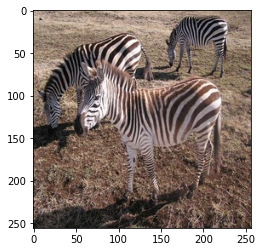

In [7]:
import matplotlib.pyplot as plt
import os

# preview some sample images.
horse_preview = plt.imread('./datasets/horse2zebra/testA/n02381460_3040.jpg')
zebra_preview = plt.imread('./datasets/horse2zebra/testB/n02391049_10910.jpg')
#plt.imshow(horse_preview)
plt.imshow(zebra_preview)

Data loader class, used to load datasets and has helper function to center crop the image to a lower resolution.

In [8]:
from PIL import Image
import os
import torch
import random
from torch import Tensor
from pathlib import Path
from typing import List, Optional, Sequence, Union, Any, Callable
from torchvision.datasets.folder import default_loader
from pytorch_lightning import LightningDataModule
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms


class HorsesDataset(Dataset):
    """
    The Horse part of the horse2zebra dataset.
    """
    def __init__(self, 
                 data_path: str, 
                 split: str,
                 transform: Callable,
                **kwargs):
        if split == 'test':
          self.data_dir = Path(data_path) / 'horse2zebra/testA'
        else:
          self.data_dir = Path(data_path) / 'horse2zebra/trainA'      
        self.transforms = transform

        imgs = sorted([f for f in self.data_dir.iterdir() if f.suffix == '.jpg'])
    
    def __len__(self):
        return len(self.imgs)
    
    def __getitem__(self, idx):
        img = default_loader(self.imgs[idx])
        
        if self.transforms is not None:
            img = self.transforms(img)
        
        return img, 0.0 # dummy datat to prevent breaking

class ZebrasDataset(Dataset):
    """
    The Zebra part of the horse2zebra dataset.
    """
    def __init__(self, 
                 data_path: str, 
                 split: str,
                 transform: Callable,
                **kwargs):
        if split == 'test':
          self.data_dir = Path(data_path) / 'horse2zebra/testB'
        else:
          self.data_dir = Path(data_path) / 'horse2zebra/trainB'      
        self.transforms = transform

        imgs = sorted([f for f in self.data_dir.iterdir() if f.suffix == '.jpg'])
    
    def __len__(self):
        return len(self.imgs)
    
    def __getitem__(self, idx):
        img = default_loader(self.imgs[idx])
        
        if self.transforms is not None:
            img = self.transforms(img)
        
        return img, 0.0 # dummy datat to prevent breaking

class HorsesAndZebrasDataset(Dataset):
    """
    The Zebra part of the horse2zebra dataset.
    """
    def __init__(self, 
                 data_path: str, 
                 split: str,
                 transform: Callable,
                **kwargs):
      
        self.transforms = transform
        self.data_dir = Path(data_path)
        imgs = []
        horse_imgs, zebra_imgs = None, None
        horse_path = self.data_dir / ('horse2zebra/testA' if split == 'test' else 'horse2zebra/trainA')
        zebra_path = self.data_dir / ('horse2zebra/testB' if split == 'test' else 'horse2zebra/trainB')
 
        horse_imgs = sorted([f for f in horse_path.iterdir() if f.suffix == '.jpg'])
        zebra_imgs = sorted([f for f in zebra_path.iterdir() if f.suffix == '.jpg'])

        # might not need to shuffle as already done by dataloader
        imgs = random.shuffle(horse_imgs + zebra_imgs)
    
    def __len__(self):
        return len(self.imgs)
    
    def __getitem__(self, idx):
        img = default_loader(self.imgs[idx])
        
        if self.transforms is not None:
            img = self.transforms(img)
        
        return img, 0.0 # dummy datat to prevent breaking

class VAEDataset(LightningDataModule):
    """
    PyTorch Lightning data module 
    Args:
        data_dir: root directory of your dataset.
        train_batch_size: the batch size to use during training.
        val_batch_size: the batch size to use during validation.
        patch_size: the size of the crop to take from the original images.
        num_workers: the number of parallel workers to create to load data
            items (see PyTorch's Dataloader documentation for more details).
        pin_memory: whether prepared items should be loaded into pinned memory
            or not. This can improve performance on GPUs.
    """

    def __init__(
        self,
        data_path: str,
        train_batch_size: int = 8,
        val_batch_size: int = 8,
        patch_size: Union[int, Sequence[int]] = (256, 256),
        num_workers: int = 0,
        pin_memory: bool = False,
        **kwargs,
    ):
        super().__init__()

        self.data_dir = data_path
        self.train_batch_size = train_batch_size
        self.val_batch_size = val_batch_size
        self.patch_size = patch_size
        self.num_workers = num_workers
        self.pin_memory = pin_memory

    def setup(self, stage: Optional[str] = None) -> None:
    
        train_transforms = transforms.Compose([transforms.ToTensor()])
        
        val_transforms = transforms.Compose([transforms.ToTensor()])
        
        self.train_dataset = HorsesAndZebrasDataset(
            self.data_dir,
            split='train',
            transform=train_transforms,
            download=False,
        )
        
        # Replace CelebA with your dataset
        self.val_dataset = HorsesAndZebrasDataset(
            self.data_dir,
            split='test',
            transform=val_transforms,
            download=False,
        )
#       ===============================================================
        
    def train_dataloader(self) -> DataLoader:
        return DataLoader(
            self.train_dataset,
            batch_size=self.train_batch_size,
            num_workers=self.num_workers,
            shuffle=True,
            pin_memory=self.pin_memory,
        )

    def val_dataloader(self) -> Union[DataLoader, List[DataLoader]]:
        return DataLoader(
            self.val_dataset,
            batch_size=self.val_batch_size,
            num_workers=self.num_workers,
            shuffle=False,
            pin_memory=self.pin_memory,
        )
    
    def test_dataloader(self) -> Union[DataLoader, List[DataLoader]]:
        return DataLoader(
            self.val_dataset,
            batch_size=144,
            num_workers=self.num_workers,
            shuffle=True,
            pin_memory=self.pin_memory,
        )



/shared-libs/python3.7/py/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=45216c0f-38c6-4876-8e22-790c3698feac' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>